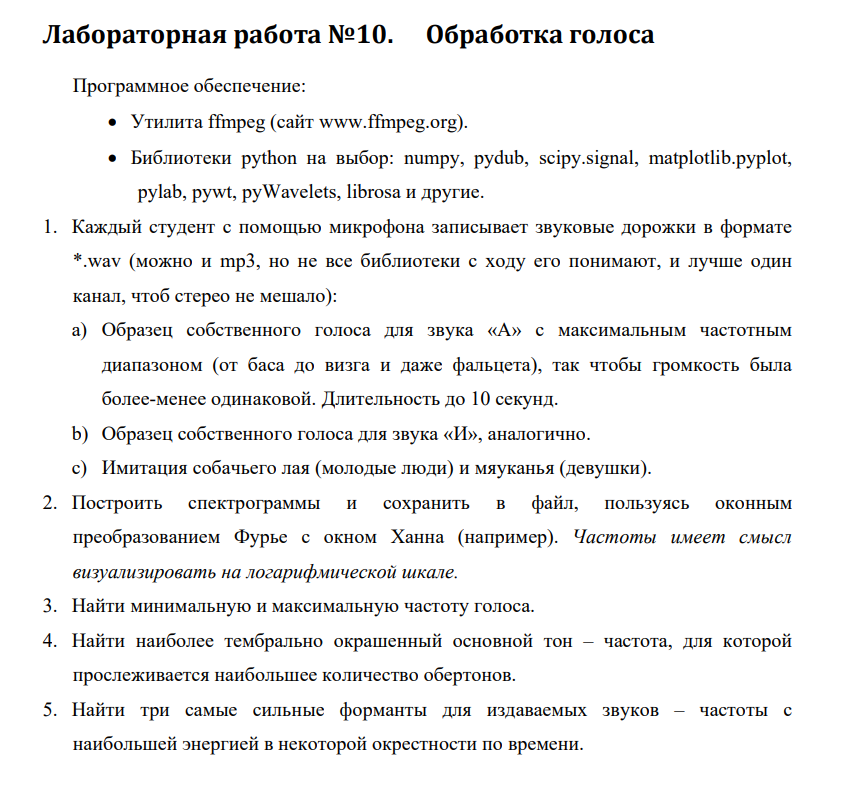

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import librosa
from scipy.io import wavfile
import soundfile as sf

In [2]:
def get_spectrogram(filename):
    audio, sr = librosa.load(filename, sr = None)

    window_size = 2048  # Size of the window for the STFT
    hop_length = int(window_size / 4)  # Hop size between consecutive windows
    n_fft = window_size


    spectrogram = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, window=signal.hann(window_size))
    spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max)


    # Plot the spectrogram
    plt.figure(figsize=(12, 5))
    librosa.display.specshow(spectrogram_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log') 
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram {filename}')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    return plt

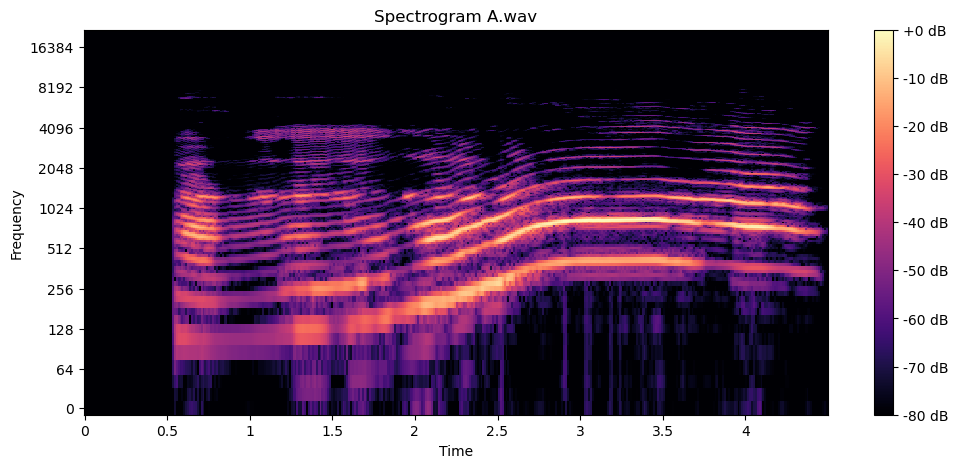

In [3]:
spectrogram_A = get_spectrogram('A.wav')
spectrogram_A.savefig('spectrogram_A.png')

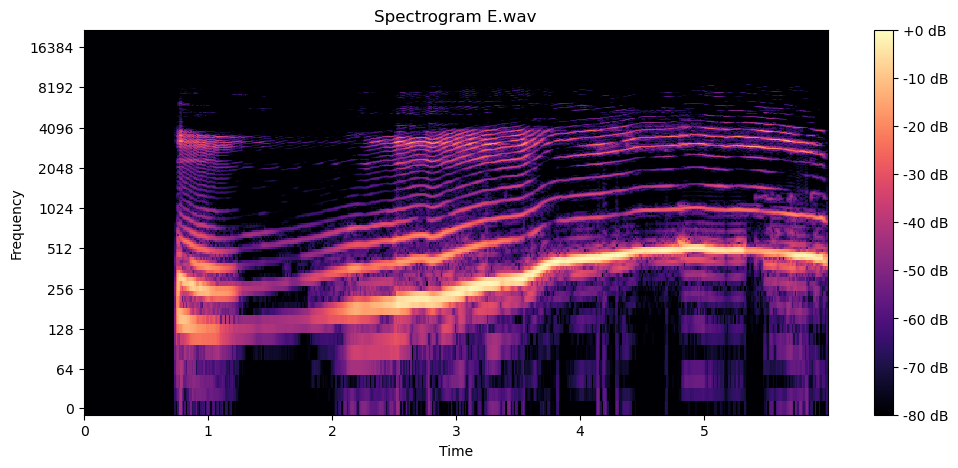

In [4]:
spectrogram_E = get_spectrogram('E.wav')
spectrogram_E.savefig('spectrogram_E.png')

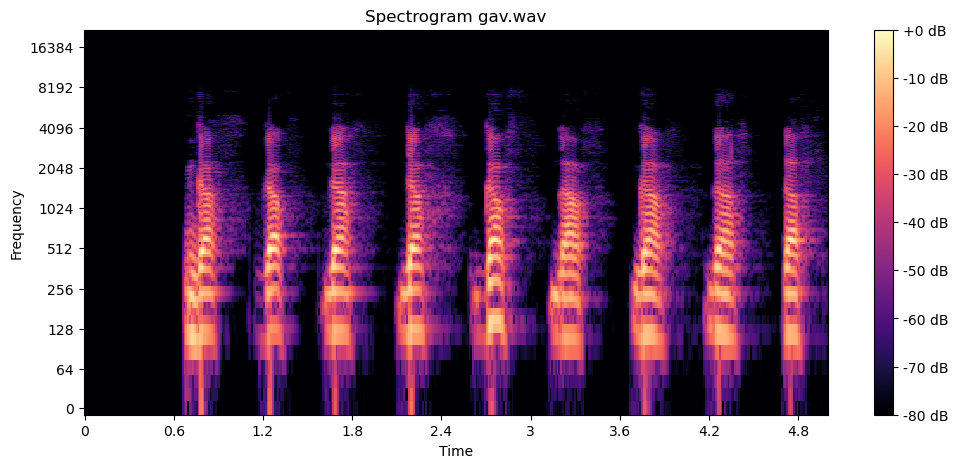

In [5]:
spectrogram_gav = get_spectrogram('gav.wav')
spectrogram_gav.savefig('spectrogram_gav.png')

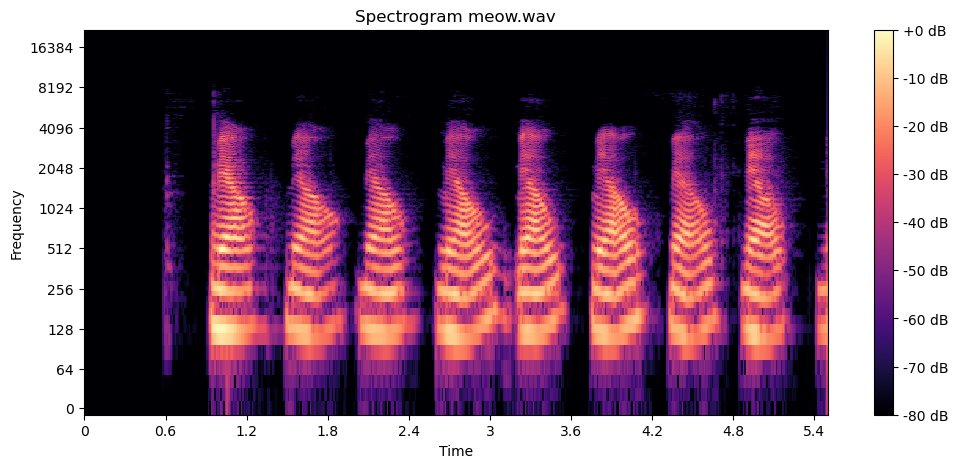

In [6]:
spectrogram_meow = get_spectrogram('meow.wav')
spectrogram_meow.savefig('spectrogram_meow.png')

In [7]:
def get_min_max_speech_freq(filename):
    audio_data, sample_rate = librosa.load(filename, sr=None, mono=True)
    frequencies = np.fft.rfftfreq(len(audio_data), d=1/sample_rate)
    magnitudes = np.abs(np.fft.rfft(audio_data))
    voice_frequencies = frequencies[np.where(magnitudes > np.mean(magnitudes))]
    min_voice_freq = np.min(voice_frequencies)
    max_voice_freq = np.max(voice_frequencies)
    return int(min_voice_freq), int(max_voice_freq)

In [8]:
min_voice_freq, max_voice_freq = get_min_max_speech_freq("A.wav")
print('A')
print("Минимальная частота голоса:", int(min_voice_freq))
print("Максимальная частота голоса:", int(max_voice_freq))

A
Минимальная частота голоса: 100
Максимальная частота голоса: 4207


In [9]:
min_voice_freq, max_voice_freq = get_min_max_speech_freq("E.wav")
print('E')
print("Минимальная частота голоса:", int(min_voice_freq))
print("Максимальная частота голоса:", int(max_voice_freq))

E
Минимальная частота голоса: 84
Максимальная частота голоса: 4184


In [10]:
min_voice_freq, max_voice_freq = get_min_max_speech_freq("gav.wav")
print('Gav')
print("Минимальная частота голоса:", int(min_voice_freq))
print("Максимальная частота голоса:", int(max_voice_freq))

Gav
Минимальная частота голоса: 0
Максимальная частота голоса: 4042


In [11]:
min_voice_freq, max_voice_freq = get_min_max_speech_freq("meow.wav")
print('Meow')
print("Минимальная частота голоса:", int(min_voice_freq))
print("Максимальная частота голоса:", int(max_voice_freq))

Meow
Минимальная частота голоса: 56
Максимальная частота голоса: 3963
